In [1]:
# Title: Cows and chickens
# Author: Valdo Joao - valdojoao90@gmail.com
# Date: 24/06/2019

In [1]:
import numpy as np
import pandas as pd
import math as ma

from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPool2D, AvgPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

from itertools import islice
import matplotlib.pyplot as plt

import time

Using TensorFlow backend.


In [3]:
# original dataset
# data
#     -> chickens
#     -> cows

# This is how I have reorganized the data
# data
#     -> test - 20% of the dataset: 815 images
#            -> chickens
#            -> cows
#        
#     -> train - 60% of the dataset: 2403 images
#            -> chickens
#            -> cows
#       
#     -> validation - 20% of the dataset: 814 images
#            -> chickens
#            -> cows

In [4]:
#Design choices:
# 'relu' performs better on NN compared with others activation functions
# A classification problem to distinghih between 2 classes: 
# output_activation = 'sigmoid'; loss = 'binary_crossentropy'
# More than 2 classes we could use activation:softwax loss:categorical_crossentropy
# CNN works well with images, other options could be Random Forest, SVM, etc
# On CNN adaptive learning rate optimzers converge faster, 
# so both 'adam' or 'rmsprop' optimzers are good options

In [6]:
#Dataset parameters
train_folder = '../data_cainthus/train'
test_folder = '../data_cainthus/test'
validation_folder = '../data_cainthus/validation'

#Network parameters 
input_size = 64       
output_size = 1
activation = 'relu'
output_activation = 'sigmoid'

#Trainning parameters
loss = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

batchSize = 32
train_steps = ma.ceil(2403/batchSize)
valid_steps = ma.ceil(814/batchSize)
test_steps = ma.ceil(814/batchSize)
epochs = 200

In [7]:
# data generator 
datagen = ImageDataGenerator(rescale = 1./255)

# perform some data augmentation on the training images
train_datagen = ImageDataGenerator(rescale = 1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rotation_range = 10,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

def get_generator_from_dir(dataGenerator, folder):
    return dataGenerator.flow_from_directory(
    folder,
    target_size = (input_size, input_size),
    batch_size = batchSize,
    shuffle = True,
    class_mode = 'binary')

In [8]:
# generator for reading train data from folder
train_generator = get_generator_from_dir(train_datagen, train_folder)

Found 2403 images belonging to 2 classes.


In [9]:
# generator for reading validation data from folder
validation_generator = get_generator_from_dir(datagen, validation_folder)

Found 814 images belonging to 2 classes.


In [10]:
# generator for reading test data from folder
test_generator = get_generator_from_dir(datagen, test_folder)

Found 815 images belonging to 2 classes.


In [10]:
# neural network model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (input_size, input_size, 3),
                 activation = activation))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = activation))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation = activation))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

# we dont need a hidden layer on the NN as our data can be linearly separable
model.add(Dense(128,activation = activation))
model.add(Dense(output_size , activation = output_activation))

In [11]:
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = metrics)

In [12]:
# get the summary of the Network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [13]:
start = time.time()

train_model = model.fit_generator(train_generator,
                    steps_per_epoch = train_steps,
                    epochs = epochs,
                    validation_data = validation_generator,
                    validation_steps = valid_steps)

end = time.time()

#Using GPU could help to decrease a lot the overall computation time
Training_time = ma.ceil((end - start)/60)
print("Aprox training time in mins: " + str(Training_time))

Epoch 1/200
76/76 [==============================] - 134s 2s/step - loss: 0.6494 - acc: 0.6177 - val_loss: 0.5511 - val_acc: 0.7482
Epoch 2/200
76/76 [==============================] - 124s 2s/step - loss: 0.5424 - acc: 0.7335 - val_loss: 0.4390 - val_acc: 0.7948
Epoch 3/200
76/76 [==============================] - 123s 2s/step - loss: 0.4757 - acc: 0.7783 - val_loss: 0.4669 - val_acc: 0.7543
Epoch 4/200
76/76 [==============================] - 122s 2s/step - loss: 0.4641 - acc: 0.7810 - val_loss: 0.3554 - val_acc: 0.8440
Epoch 5/200
76/76 [==============================] - 123s 2s/step - loss: 0.4456 - acc: 0.7942 - val_loss: 0.4219 - val_acc: 0.8047
Epoch 6/200
76/76 [==============================] - 122s 2s/step - loss: 0.4158 - acc: 0.8057 - val_loss: 0.3401 - val_acc: 0.8747
Epoch 7/200
76/76 [==============================] - 122s 2s/step - loss: 0.4049 - acc: 0.8057 - val_loss: 0.3449 - val_acc: 0.8870
Epoch 8/200
76/76 [==============================] - 124s 2s/step - loss: 0.

76/76 [==============================] - 122s 2s/step - loss: 0.0970 - acc: 0.9663 - val_loss: 0.2701 - val_acc: 0.9189
Epoch 124/200
76/76 [==============================] - 121s 2s/step - loss: 0.0982 - acc: 0.9630 - val_loss: 0.2540 - val_acc: 0.9201
Epoch 125/200
76/76 [==============================] - 121s 2s/step - loss: 0.1156 - acc: 0.9589 - val_loss: 0.2392 - val_acc: 0.9238
Epoch 126/200
76/76 [==============================] - 121s 2s/step - loss: 0.1011 - acc: 0.9545 - val_loss: 0.2543 - val_acc: 0.9226
Epoch 127/200
76/76 [==============================] - 121s 2s/step - loss: 0.0955 - acc: 0.9626 - val_loss: 0.2323 - val_acc: 0.9238
Epoch 128/200
76/76 [==============================] - 121s 2s/step - loss: 0.0864 - acc: 0.9683 - val_loss: 0.2571 - val_acc: 0.9337
Epoch 129/200
76/76 [==============================] - 121s 2s/step - loss: 0.0965 - acc: 0.9609 - val_loss: 0.2324 - val_acc: 0.9263
Epoch 130/200
76/76 [==============================] - 121s 2s/step - loss: 

In [14]:
model.save('my_model' + '.h5')

In [15]:
# load_model('my_model' + '.h5')

In [16]:
# list all data in history
print(train_model.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


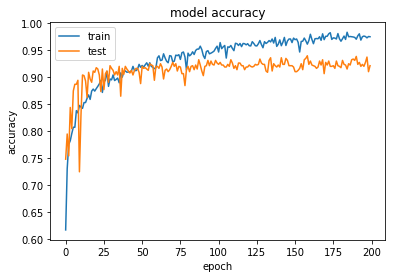

In [17]:
# summarize history for accuracy
plt.plot(train_model.history['acc'])
plt.plot(train_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

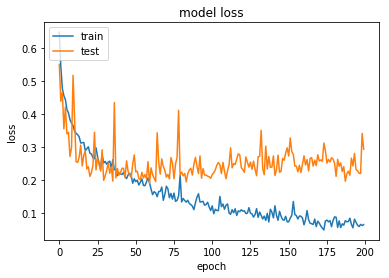

In [18]:
# summarize history for loss
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# prepare the data for the prediction
X_test = []
y_test = []

for ts in islice(test_generator, len(test_generator)):
    X_test.append(ts[0])
    y_test.append(ts[1])
    
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

In [21]:
#predict the model
y_pred = model.predict_classes(X_test).ravel()

In [22]:
#get the wrongly predicted values
results = np.argwhere(y_test != y_pred).ravel()
print("index of Wrong predictions: " + str(results))

index of Wrong predictions: [  8  15  17  22  33  40  47  49  54  65  69  73  75  91 102 108 112 129
 131 134 138 140 143 149 150 156 214 231 234 243 306 324 334 339 356 358
 365 377 379 384 385 387 416 424 427 431 436 447 455 462 464 484 505 524
 525 529 549 554 558 571 572 580 582 583 602 603 606 632 639 650 653 656
 672 684 695 706 724 732 733 749 757 770 810]


In [31]:
#get the test accuraccy in %
test_acc = 1 - (len(results) / len(y_pred))
print("Accuraccy on the test set is: " + str(round(test_acc, 4)))

Accuraccy on the test set is: 0.8982


In [32]:
#Train set acc aprox 97%, validation set acc aprox 92%, test set acc aprox 90%
#The overall results are quite acceptable

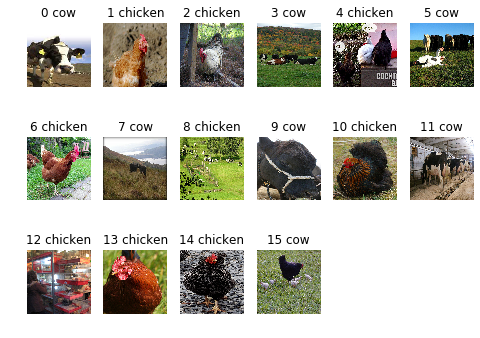

In [33]:
#Vizualization check of the predicted result for a given image of test data set
#classes: 0 chicken; 1 cow 

def animal(i):
    switcher={
                0:' chicken',
                1:' cow'
             }
    return switcher.get(i,"Invalid input")

plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 6, i+1)
    plt.title(str(i) + animal(y_pred[i]))
    plt.axis('off')
    plt.imshow(X_test[i])